In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup
import re
import time
import math

#드라이버 불러오기
path = 'chromedriver'
excutable_path = 'chromedriver.exe'
source_url = "https://map.kakao.com/"
driver = webdriver.Chrome(executable_path=excutable_path)

#인터넷 접속
driver.get(source_url)

#서치
search=driver.find_element(By.XPATH,'//*[@id="search.keyword.query"]')
search.send_keys("역삼동 카페")
search.send_keys(Keys.ENTER)

driver.implicitly_wait(time_to_wait=5)


In [3]:
#카페 이름, url 뜯어오기

urls=[]
names=[]


def name_url():
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    moreviews = soup.find_all(name="a", attrs={"class":"moreview"}) #상세보기 모두 가져오기. 
    namelist=soup.find_all(name='a',attrs={"class":"link_name"}) #식당 이름 가져오기
    #근데 스크롤 안 내린 거 상에서만 다 가져온 것. 
    # < 눌러서 더 가져와야 함. 
    
    for i in moreviews:
        page_url=i.get("href")
        urls.append(page_url)

    for i in namelist:
        name=i.get("title")
        names.append(name)
    #첫 페이지에서 이름 뜯어옴. 

In [4]:
#첫 페이지에서 가져오기 
name_url()

In [5]:
#장소 더보기 누르기
more_place_button=driver.find_element(By.XPATH,'//*[@id="info.search.place.more"]')
driver.execute_script("arguments[0].click();", more_place_button) 

In [6]:
page_num=2 #현재 페이지

while True:
    name_url() #현재 페이지에서 다 뜯어오기
    print(page_num)
    page_num+=1 #다음 페이지 번호
    if page_num==6:
        print("> 버튼을 누릅니다.")
        next_button=driver.find_element(By.XPATH,'//*[@id="info.search.page.next"]') #넥스트 버튼 찾기.
        if next_button.get_attribute("class")=='next disabled':
            print("끝났습니다.")
            break
        driver.execute_script("arguments[0].click();", next_button) #넥스트 버튼 누르기
        page_num=1  #페이지 번호 초기화
        print(next_button.get_attribute("class"))
        
    else:
        page_xpath= '//*[@id="info.search.page.no'+str(page_num)+'"]' #다음 페이지의 xpath
        page_button=driver.find_element(By.XPATH,page_xpath) #다음 페이지 버튼 찾기
        driver.execute_script("arguments[0].click();", page_button)  #다음 페이지 버튼 누르기

2
3
4
5
> 버튼을 누릅니다.
next
1
2
3
4
5
> 버튼을 누릅니다.
next
1
2
3
4
5
> 버튼을 누릅니다.
next
1
2
3
4
5
> 버튼을 누릅니다.
next
1
2
3
4
5
> 버튼을 누릅니다.
next
1
2
3
4
5
> 버튼을 누릅니다.
next disabled
1
2
3
4
5
> 버튼을 누릅니다.
끝났습니다.


In [7]:
names #29페이지부터 제대로 불러와지지 않았음.

['알베르',
 '블루보틀 역삼 카페',
 '썸띵어바웃커피',
 '카페413프로젝트',
 '랑데자뷰 강남점',
 '정월',
 '카페무라노',
 '가배도 신논현점',
 '루프808',
 '더달달',
 '빌리엔젤 강남역점',
 '까치화방 강남점',
 '코드케이 강남점',
 '크리에잇쿠키 역삼점',
 '겟썸커피 다운스테어즈',
 '비트포비아 강남던전점',
 '로얄마카롱',
 '스타벅스 강남R점',
 '클로리스 역삼GFC점',
 '로브니',
 '빌리엔젤 강남역5호점',
 '키이스케이프 강남 더오름',
 '트리오드',
 '쉼스토리',
 '고양이라좋은날',
 '후웨이즈텐카민',
 '엑스케이프 강남점',
 '키이스케이프 강남점',
 '평화다방 강남역점',
 '데블다이스 보드게임카페 강남점',
 '비트포비아 강남던전점',
 '로얄마카롱',
 '스타벅스 강남R점',
 '클로리스 역삼GFC점',
 '로브니',
 '빌리엔젤 강남역5호점',
 '키이스케이프 강남 더오름',
 '트리오드',
 '쉼스토리',
 '고양이라좋은날',
 '후웨이즈텐카민',
 '엑스케이프 강남점',
 '키이스케이프 강남점',
 '평화다방 강남역점',
 '데블다이스 보드게임카페 강남점',
 '욕망의북카페',
 '뮬리',
 '스크렘',
 '스타벅스 강남대로점',
 '할리스 강남역점',
 '에이비카페',
 '빌리엔젤 강남358타워점',
 '어퍼앤언더',
 '투썸플레이스 강남대륭타워점',
 '브라운홀릭',
 '넥스트에디션 강남5호점',
 '스타벅스 선릉역점',
 '룸카페 바니',
 '카페봄',
 '카페더왈츠',
 '스타벅스 강남비젼타워점',
 '라브리크 서울',
 '사주테라피',
 '투썸플레이스 강남역중앙점',
 '벌툰 인더스트리얼 강남역점',
 '커피빈 강남역12번출구점',
 '스타벅스 강남오거리점',
 '반지만들기 반지공방 8그램',
 '레드버튼 강남점',
 '바나프레소 강남점',
 '커피빈 강남역먹자골목점',
 '마스터키 강남점',
 '502커피로스터스 역삼점',
 '타우너스에스프레소바 강남점',
 '만랩커피 

In [8]:
name_url()

In [9]:
names

['알베르',
 '블루보틀 역삼 카페',
 '썸띵어바웃커피',
 '카페413프로젝트',
 '랑데자뷰 강남점',
 '정월',
 '카페무라노',
 '가배도 신논현점',
 '루프808',
 '더달달',
 '빌리엔젤 강남역점',
 '까치화방 강남점',
 '코드케이 강남점',
 '크리에잇쿠키 역삼점',
 '겟썸커피 다운스테어즈',
 '비트포비아 강남던전점',
 '로얄마카롱',
 '스타벅스 강남R점',
 '클로리스 역삼GFC점',
 '로브니',
 '빌리엔젤 강남역5호점',
 '키이스케이프 강남 더오름',
 '트리오드',
 '쉼스토리',
 '고양이라좋은날',
 '후웨이즈텐카민',
 '엑스케이프 강남점',
 '키이스케이프 강남점',
 '평화다방 강남역점',
 '데블다이스 보드게임카페 강남점',
 '비트포비아 강남던전점',
 '로얄마카롱',
 '스타벅스 강남R점',
 '클로리스 역삼GFC점',
 '로브니',
 '빌리엔젤 강남역5호점',
 '키이스케이프 강남 더오름',
 '트리오드',
 '쉼스토리',
 '고양이라좋은날',
 '후웨이즈텐카민',
 '엑스케이프 강남점',
 '키이스케이프 강남점',
 '평화다방 강남역점',
 '데블다이스 보드게임카페 강남점',
 '욕망의북카페',
 '뮬리',
 '스크렘',
 '스타벅스 강남대로점',
 '할리스 강남역점',
 '에이비카페',
 '빌리엔젤 강남358타워점',
 '어퍼앤언더',
 '투썸플레이스 강남대륭타워점',
 '브라운홀릭',
 '넥스트에디션 강남5호점',
 '스타벅스 선릉역점',
 '룸카페 바니',
 '카페봄',
 '카페더왈츠',
 '스타벅스 강남비젼타워점',
 '라브리크 서울',
 '사주테라피',
 '투썸플레이스 강남역중앙점',
 '벌툰 인더스트리얼 강남역점',
 '커피빈 강남역12번출구점',
 '스타벅스 강남오거리점',
 '반지만들기 반지공방 8그램',
 '레드버튼 강남점',
 '바나프레소 강남점',
 '커피빈 강남역먹자골목점',
 '마스터키 강남점',
 '502커피로스터스 역삼점',
 '타우너스에스프레소바 강남점',
 '만랩커피 

In [10]:
#카페 리스트 만들기 
cafe_df=pd.DataFrame({"name":names,"url":urls})
cafe_df

,name,url
0,알베르,https://place.map.kakao.com/22837049
1,블루보틀 역삼 카페,https://place.map.kakao.com/495658881
2,썸띵어바웃커피,https://place.map.kakao.com/2005375589
3,카페413프로젝트,https://place.map.kakao.com/1937691860
4,랑데자뷰 강남점,https://place.map.kakao.com/714214219
...,...,...
510,85lab,https://place.map.kakao.com/1894588294
511,매머드익스프레스 국기원점,https://place.map.kakao.com/2065134729
512,콘체르토,https://place.map.kakao.com/875127994
513,에슬로우 GS타워점,https://place.map.kakao.com/1731262934


In [11]:
cafe_df.to_csv("ys_cafe_df.csv",index=False, encoding="cp949")

In [12]:
total_review=pd.DataFrame(columns=["name","review","star","review_num"]) #전체 리뷰 저장할 데이터 프레임. 


In [13]:
import tqdm

In [14]:
for idx,row in tqdm.tqdm_notebook(cafe_df.iterrows(),total=cafe_df.shape[0]):
    #위의 코드 합치기. 
    url=row["url"]
    driver.get(url) #링크 접속
    t1=driver.page_source
    t2=BeautifulSoup(t1, "html.parser")
    t3=t2.find(name="div", attrs={"class":"evaluation_review"})
    print("접속 완료")
    driver.implicitly_wait(time_to_wait=5)

    #후기가 없다면 그대로 나가기.
    try:
        review_count=driver.find_element(By.CSS_SELECTOR,"#mArticle > div.cont_essential > div:nth-child(1) > div.place_details > div > div > a:nth-child(3) > span.color_g")
        if review_count.text=="(0)":
            print("후기 없음")
            continue
    except:#후기 미제공
        print("후기 미제공")
        continue
    #리뷰를 끝까지 다 내리기. 
    #중복되는 후기가 너무 많음. =>근데 또 손으로 하나하나 눌러보면 괜찮음. =>implicitly_wait함
    try:
        more_info_button=driver.find_element(By.CSS_SELECTOR,'#mArticle > div.cont_evaluation > div.evaluation_review > a') #더보기 버튼
        while True:
            if more_info_button.get_attribute("class")=='link_more link_unfold':
                break
            driver.execute_script("arguments[0].click();", more_info_button) 
        print("리뷰 내리기 완료")
        #오류: 못 나옴. 해결->css로 버튼에 접근. 
        if more_info_button.get_attribute("class")=='link_more':
            driver.execute_script("arguments[0].click();", more_info_button)
        driver.implicitly_wait(time_to_wait=2)
    except:
        print("내릴 스크롤이 없음. ")
        pass
    try:
        #리뷰 더보기 모두 클릭하기
        long_review_button=driver.find_elements(By.CSS_SELECTOR,'#mArticle > div.cont_evaluation > div.evaluation_review > ul > li > div.comment_info > p > button')

        for button in long_review_button:
            driver.execute_script("arguments[0].click();", button) 
            #개선 사항: 시간이 너무 오래 걸림. 버튼을 한번에 누를 방법이 없을까? 167개 누르는데 1분은 걸린듯. 
        print("리뷰 더보기 모두 클릭 완료")
    except:
        print("누를 더보기 버튼 없음.")
        pass

    #리뷰 모두 끌어오기 
    t1=driver.page_source
    t2=BeautifulSoup(t1, "html.parser")
    t3=t2.find(name="div", attrs={"class":"evaluation_review"})

    print("리뷰 모두 끌어오기 완료 ")


    #별점 리스트 만들기
    star=t3.find_all('span',{'class':'ico_star inner_star'}) #크롤링

    star_list=[]
    for i in star:
        real_star=int(i['style'].split(":")[1].split("%")[0])

        real_star/=20
        star_list.append(real_star)
    #평균 별점 끌어오기<span class="txt_desc">3.6</span>/ 후기 끌어오기
    ave_star=t3.find_all("span",{"class":"txt_desc"})
    ave_star_list=[]
    review_num_list=[]
    index=0
    for i in ave_star:
        if index%2!=0:
            ave_star_list.append(i.text)
        else:
            review_num_list.append(i.text)
        index+=1
    
    
    #리뷰 크롤링
    review=t3.find_all('p',{'class':'txt_comment'})
    #리뷰 리스트 만들기 
    review_list=[]
    for i in review:
        real_review=i.text
        review_list.append(real_review)

    df=pd.DataFrame(columns=["name","review","star"])
    df["review"]=review_list
    df["star"]=star_list
    df["name"]=row["name"]
    df["ave_star"]=ave_star_list
    df["review_num"]=review_num_list
    total_review=total_review.append(df,ignore_index=True)
    print("한 가게 리뷰 크롤링 완료")

  0%|          | 0/515 [00:00<?, ?it/s]

접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰

리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
후기 없음
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 

리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
후기 없음
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
후기 미제공
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모

리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
후기 없음
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
후기 없음
접속 완료
후기 없음
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
후기 없음
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
리뷰 내리기 완료
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한 가게 리뷰 크롤링 완료
접속 완료
후기 없음
접속 완료
내릴 스크롤이 없음. 
리뷰 더보기 모두 클릭 완료
리뷰 모두 끌어오기 완료 
한

In [15]:
total_review

,name,review,star,review_num,ave_star
0,알베르,공간은 엄청 큰데 테이블이 대부분 쫘라락 나열되어 있어서 약간 닭장같은 느낌. 친절...,2.0,127,3.7
1,알베르,더보기,3.0,445,3.6
2,알베르,더보기,3.0,31,4.0
3,알베르,"히비커스차는 풍선껌 단물빠져서 씹뱉하고 물한모금 먹는 맛, 얼음 개많음 돈주고 얼...",1.0,16,3.6
4,알베르,큰거빼고 그냥..더보기,4.0,109,4.2
...,...,...,...,...,...
11389,콘체르토,마음에 들지 않는것을 찾기 어려운게 문제입니다.더보기,5.0,2,5.0
11390,콘체르토,더보기,5.0,41,4.8
11391,콘체르토,마음에 들지 않는것을 찾기 어려운게 문제입니다.더보기,5.0,2,5.0
11392,바움,엉성한 느낌이 들기도 하지만 강남역에서 비교적 차분한 분위기의 화이트 톤 카페.인텔...,4.0,41,4.3


In [16]:
total_review.to_csv("total_review_ys_raw.csv",encoding="utf-8-sig" ,index=False)

In [17]:
###여기까지 크롤링 코드이고

In [19]:
###아래는 최종 전처리와는 다르게 전처리 한 코드여서 무시해주시면 됩니당

In [16]:
df_copy = total_review.copy()

In [17]:
df_copy = df_copy.drop_duplicates(['review'], keep = 'first') #중복제거

In [18]:
df_copy

,name,review,star,review_num,ave_star
0,블루보틀 역삼 카페,갬성 블루보틀~~평일 낮애도 직장인들로 북적북적더보기,3.0,25,3.2
1,블루보틀 역삼 카페,"지인모임 후에 커피마시러 방문했어요!모임 사진찍는데 사진도 먼저 찍어주시고, 뒤에 ...",5.0,14,3.7
2,블루보틀 역삼 카페,맛과 친절 너무 좋습니다 자주 방문하는 곳더보기,5.0,18,3.8
3,블루보틀 역삼 카페,더보기,4.0,291,2.8
4,블루보틀 역삼 카페,디카페인은 시키지 않는편이…산미가 매우 강합니다더보기,3.0,73,3.7
...,...,...,...,...,...
11500,만랩커피 역삼래미안점,직원분 친절하시고 쾌적한 매장입니다라떼가 정말 맛있어요!더보기,5.0,1,5.0
11501,만랩커피 역삼래미안점,음료 맛있고 친절해욥!근데 ..앉아서 먹기가 쫌 그래용 ㅎㅎ더보기,5.0,1,5.0
11502,만랩커피 역삼래미안점,알바생인지 직원인지 남자분 일하시는데 에어팟끼고 음료만드네요 ㅠㅠ 음료는 맛있는데 ...,2.0,1,2.0
11504,카페자스 선릉점,판교에서 먹어보고 강남에도 있길래 와봤네요! 가족이 하는거같이요! 자두주스 맛있네요...,5.0,39,3.8


In [19]:
df_copy['review'] = df_copy['review'].str.replace('더보기','') 
#뒤에 붙은 '더보기' 제거

In [20]:
df_copy['review'] = df_copy['review'].str.replace('접기','')
#뒤에 붙은 '접기' 제거

In [21]:
df_copy

,name,review,star,review_num,ave_star
0,블루보틀 역삼 카페,갬성 블루보틀~~평일 낮애도 직장인들로 북적북적,3.0,25,3.2
1,블루보틀 역삼 카페,"지인모임 후에 커피마시러 방문했어요!모임 사진찍는데 사진도 먼저 찍어주시고, 뒤에 ...",5.0,14,3.7
2,블루보틀 역삼 카페,맛과 친절 너무 좋습니다 자주 방문하는 곳,5.0,18,3.8
3,블루보틀 역삼 카페,,4.0,291,2.8
4,블루보틀 역삼 카페,디카페인은 시키지 않는편이…산미가 매우 강합니다,3.0,73,3.7
...,...,...,...,...,...
11500,만랩커피 역삼래미안점,직원분 친절하시고 쾌적한 매장입니다라떼가 정말 맛있어요!,5.0,1,5.0
11501,만랩커피 역삼래미안점,음료 맛있고 친절해욥!근데 ..앉아서 먹기가 쫌 그래용 ㅎㅎ,5.0,1,5.0
11502,만랩커피 역삼래미안점,알바생인지 직원인지 남자분 일하시는데 에어팟끼고 음료만드네요 ㅠㅠ 음료는 맛있는데 ...,2.0,1,2.0
11504,카페자스 선릉점,판교에서 먹어보고 강남에도 있길래 와봤네요! 가족이 하는거같이요! 자두주스 맛있네요!,5.0,39,3.8


In [22]:
df_copy['review'] = df_copy['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
#한글과 띄어쓰기 제외하고 모두 제거

In [23]:
df_copy

,name,review,star,review_num,ave_star
0,블루보틀 역삼 카페,갬성 블루보틀평일 낮애도 직장인들로 북적북적,3.0,25,3.2
1,블루보틀 역삼 카페,지인모임 후에 커피마시러 방문했어요모임 사진찍는데 사진도 먼저 찍어주시고 뒤에 바리...,5.0,14,3.7
2,블루보틀 역삼 카페,맛과 친절 너무 좋습니다 자주 방문하는 곳,5.0,18,3.8
3,블루보틀 역삼 카페,,4.0,291,2.8
4,블루보틀 역삼 카페,디카페인은 시키지 않는편이산미가 매우 강합니다,3.0,73,3.7
...,...,...,...,...,...
11500,만랩커피 역삼래미안점,직원분 친절하시고 쾌적한 매장입니다라떼가 정말 맛있어요,5.0,1,5.0
11501,만랩커피 역삼래미안점,음료 맛있고 친절해욥근데 앉아서 먹기가 쫌 그래용 ㅎㅎ,5.0,1,5.0
11502,만랩커피 역삼래미안점,알바생인지 직원인지 남자분 일하시는데 에어팟끼고 음료만드네요 ㅠㅠ 음료는 맛있는데 ...,2.0,1,2.0
11504,카페자스 선릉점,판교에서 먹어보고 강남에도 있길래 와봤네요 가족이 하는거같이요 자두주스 맛있네요,5.0,39,3.8


In [24]:
df_copy['review'] = df_copy['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
df_copy['review'].replace('', np.nan, inplace=True)
print(df_copy.isnull().sum())

name           0
review        71
star           0
review_num     0
ave_star       0
dtype: int64


In [25]:
df_copy.loc[df_copy.review.isnull()][:5]

,name,review,star,review_num,ave_star
3,블루보틀 역삼 카페,NaN,4.0,291,2.8
475,알베르,NaN,3.0,20,3.7
541,알베르,NaN,1.0,2,3.0
724,알베르,NaN,3.0,"8,535",3.3
777,썸띵어바웃커피,NaN,3.0,"8,535",3.3


In [26]:
df_copy = df_copy.dropna(how = 'any')

In [27]:
df_copy

,name,review,star,review_num,ave_star
0,블루보틀 역삼 카페,갬성 블루보틀평일 낮애도 직장인들로 북적북적,3.0,25,3.2
1,블루보틀 역삼 카페,지인모임 후에 커피마시러 방문했어요모임 사진찍는데 사진도 먼저 찍어주시고 뒤에 바리...,5.0,14,3.7
2,블루보틀 역삼 카페,맛과 친절 너무 좋습니다 자주 방문하는 곳,5.0,18,3.8
4,블루보틀 역삼 카페,디카페인은 시키지 않는편이산미가 매우 강합니다,3.0,73,3.7
5,블루보틀 역삼 카페,가격이 높은 편이지만 카페라떼가 맛있어요,4.0,119,4.0
...,...,...,...,...,...
11500,만랩커피 역삼래미안점,직원분 친절하시고 쾌적한 매장입니다라떼가 정말 맛있어요,5.0,1,5.0
11501,만랩커피 역삼래미안점,음료 맛있고 친절해욥근데 앉아서 먹기가 쫌 그래용 ㅎㅎ,5.0,1,5.0
11502,만랩커피 역삼래미안점,알바생인지 직원인지 남자분 일하시는데 에어팟끼고 음료만드네요 ㅠㅠ 음료는 맛있는데 ...,2.0,1,2.0
11504,카페자스 선릉점,판교에서 먹어보고 강남에도 있길래 와봤네요 가족이 하는거같이요 자두주스 맛있네요,5.0,39,3.8


In [28]:
df_copy['ave_star'] = pd.to_numeric(df_copy['ave_star'])

In [29]:
df_copy = df_copy[df_copy['ave_star'] >= 2]
#평균 별점이 2점 미만인 사람은 날리기

In [30]:
df_copy

,name,review,star,review_num,ave_star
0,블루보틀 역삼 카페,갬성 블루보틀평일 낮애도 직장인들로 북적북적,3.0,25,3.2
1,블루보틀 역삼 카페,지인모임 후에 커피마시러 방문했어요모임 사진찍는데 사진도 먼저 찍어주시고 뒤에 바리...,5.0,14,3.7
2,블루보틀 역삼 카페,맛과 친절 너무 좋습니다 자주 방문하는 곳,5.0,18,3.8
4,블루보틀 역삼 카페,디카페인은 시키지 않는편이산미가 매우 강합니다,3.0,73,3.7
5,블루보틀 역삼 카페,가격이 높은 편이지만 카페라떼가 맛있어요,4.0,119,4.0
...,...,...,...,...,...
11500,만랩커피 역삼래미안점,직원분 친절하시고 쾌적한 매장입니다라떼가 정말 맛있어요,5.0,1,5.0
11501,만랩커피 역삼래미안점,음료 맛있고 친절해욥근데 앉아서 먹기가 쫌 그래용 ㅎㅎ,5.0,1,5.0
11502,만랩커피 역삼래미안점,알바생인지 직원인지 남자분 일하시는데 에어팟끼고 음료만드네요 ㅠㅠ 음료는 맛있는데 ...,2.0,1,2.0
11504,카페자스 선릉점,판교에서 먹어보고 강남에도 있길래 와봤네요 가족이 하는거같이요 자두주스 맛있네요,5.0,39,3.8


In [31]:
df_copy.to_csv("total_review_ys.csv",encoding="utf-8-sig" ,index=False)

In [97]:
df_copy = df_copy[(df_copy['star']!=3) | (df_copy['avg_star']!=3)]
#리뷰별점과 평균별점이 모두다 3점인 레코드는 날리기(둘중 하나만 3점인 경우는 내비두기)

In [100]:
df_copy

,name,review,star,avg_star
0,카페써드,지하철 바로 앞이라 좋음 배도라지차마셨는데 맛있어서 다음에도 청들어간거 마실까함,5.0,4.7
1,카페써드,분위기도 맛도 괜찮은편이라 종종 가요,4.0,4.4
2,카페써드,커피맛이 좋았어요 또 갈께요,4.0,4.4
3,카페써드,카페 너무 이뻐요,5.0,5.0
4,카페써드,맛있는 메뉴가 많아요,5.0,4.5
...,...,...,...,...
3935,뚜또카페,일리커피 원두카페라떼 존맛,5.0,4.5
3936,더스쿼어 [The Square),이 근방 커피 중에 제일 맛있어요 특히 따뜻한 카페라떼가 제일 맛있어서 항상 여기서...,5.0,5.0
3937,카페쑥스럽 논현점,우리동네 최고예요,5.0,4.3
3938,매머드커피 강남구청점,맛있고 친절해용 ㅎㅎ,5.0,3.7


In [101]:
label = []
for i, j in zip(df_copy['star'], df_copy['avg_star']):
    if i >= 4:
        label.append('1')
    elif i <= 2:
        label.append('0')
    else:
        if (i-j) >= 1:
            label.append('1')
        else:
            label.append('0')

In [102]:
label

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1'

In [103]:
df_copy['label'] = label

In [104]:
df_copy

,name,review,star,avg_star,label
0,카페써드,지하철 바로 앞이라 좋음 배도라지차마셨는데 맛있어서 다음에도 청들어간거 마실까함,5.0,4.7,1
1,카페써드,분위기도 맛도 괜찮은편이라 종종 가요,4.0,4.4,1
2,카페써드,커피맛이 좋았어요 또 갈께요,4.0,4.4,1
3,카페써드,카페 너무 이뻐요,5.0,5.0,1
4,카페써드,맛있는 메뉴가 많아요,5.0,4.5,1
...,...,...,...,...,...
3935,뚜또카페,일리커피 원두카페라떼 존맛,5.0,4.5,1
3936,더스쿼어 [The Square),이 근방 커피 중에 제일 맛있어요 특히 따뜻한 카페라떼가 제일 맛있어서 항상 여기서...,5.0,5.0,1
3937,카페쑥스럽 논현점,우리동네 최고예요,5.0,4.3,1
3938,매머드커피 강남구청점,맛있고 친절해용 ㅎㅎ,5.0,3.7,1


<AxesSubplot:>

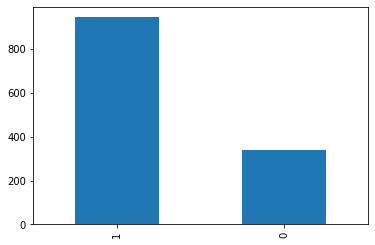

In [105]:
df_copy['label'].value_counts().plot(kind = 'bar')

In [106]:
df_copy.to_csv("total_review_nh.csv",encoding="utf-8-sig" ,index=False) #이모지도 제대로 나오고! 오류 해결!

In [ ]:
#review에 더보기만 나온 경우: 별점만 있는 리뷰. 삭제하면 될듯. =>완료